# Bias-Variance Tradeoff

Der **Bias-Variance Tradeoff** beschreibt den Kompromiss zwischen **Bias (Verzerrung)** und **Variance (Varianz)** in einem Modell, die zusammen die Gesamtfehlerquote beeinflussen. Dieses Konzept ist in der Statistik und im maschinellen Lernen besonders wichtig, da es uns hilft zu verstehen, wie ein Modell auf neuen Daten generalisiert.

### 1. Bias (Verzerrung)
Bias ist der Fehler, der durch Annahmen im Modell entsteht. Ein Modell mit hohem Bias ist oft **zu einfach** und unterschätzt die Komplexität der Daten, was zu **Underfitting** führt. In solchen Fällen kann das Modell wichtige Muster in den Daten nicht erkennen.

### 2. Variance (Varianz)
Variance bezieht sich auf die **Empfindlichkeit des Modells gegenüber Schwankungen in den Trainingsdaten**. Ein Modell mit hoher Varianz ist oft **zu komplex** und passt sich stark an die Trainingsdaten an, was zu **Overfitting** führt. Hierbei merkt sich das Modell das Rauschen und die spezifischen Details der Trainingsdaten, was die Vorhersagekraft auf neuen Daten verschlechtert.

### Der Kompromiss
- **Niedriger Bias und niedrige Varianz** sind ideal, jedoch schwer zu erreichen.
- **Hoher Bias und niedrige Varianz** bedeutet, dass das Modell stabil, aber oft zu ungenau ist (Underfitting).
- **Niedriger Bias und hohe Varianz** führt dazu, dass das Modell sehr gut auf den Trainingsdaten funktioniert, aber schlecht auf neuen Daten (Overfitting).

Der Schlüssel zum Bias-Variance Tradeoff ist es, ein Modell zu finden, das einen **guten Kompromiss** zwischen Bias und Varianz bietet, sodass es auf neuen Daten gut generalisiert.

# Beispiel: Bias-Variance Tradeoff

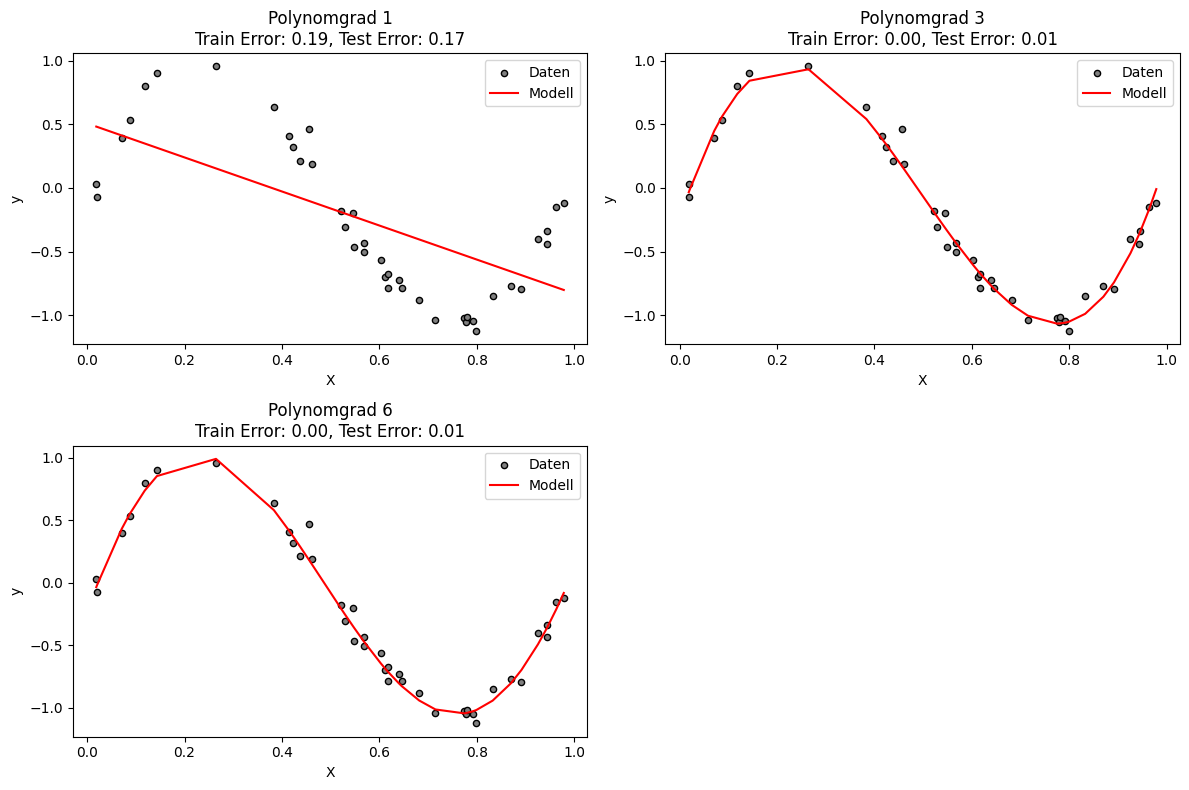

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Beispiel-Daten
np.random.seed(0)
X = np.sort(np.random.rand(40, 1), axis=0)
y = np.sin(2 * np.pi * X).ravel() + np.random.normal(0, 0.1, X.shape[0])
# Erstellt hier eine Sinuskurve um ein Beispiel 
# mit einer gewissen Komplexität zu bieten.

# Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

# Verschiedene Modellkomplexitäten ausprobieren (Polynomgrade)
degrees = [1, 3, 6]
plt.figure(figsize=(12, 8))

for i, degree in enumerate(degrees):
    poly_features = PolynomialFeatures(degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Visualisierung
    plt.subplot(2, 2, i + 1)
    plt.scatter(X, y, s=20, edgecolor="black", c="gray", label="Daten")
    plt.plot(X, model.predict(poly_features.transform(X)), color="red", label="Modell")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"Polynomgrad {degree}\nTrain Error: {train_error:.2f}, Test Error: {test_error:.2f}")
    plt.legend()

plt.tight_layout()
plt.show()

### Schritt für Schritt Erklärung des Codes

Es wird eine Kombination aus `fit_transform` und `transform` verwendet, um eine konsistente Transformation auf den Trainings- und Testdaten sicherzustellen.

#### 1. `poly_features.fit_transform(X_train)`

Wenn fit_transform auch das `PolynomialFeatures`-Objekt angewandt wird passieren zwei Dinge:

1. **fit** passt das `PolynomialFeatures`-Objekt an die Trainingsdaten an, indem es die Polynomgrade berechnet und die Struktur bestimmt.
2. **transform** wendet diese Polynomstruktur auf die Trainingsdaten an und generiert neue Merkmale.

Das Ergebnis ist ein transformiertes `X_train_poly`, das zusätzliche Merkmale wie $X, X^2, \dots, X^{\text{degree}}$ enthält. 

#### 2. `X_test_poly = poly_features.transform(X_test)`

`transform` wird auf die **Testdaten** angewendet, aber **ohne erneut `fit` aufzurufen**. Das ist wichtig, weil:
- Dieselbe Polynomstruktur verwendet werden soll, die wir an den Trainingsdaten angepasst haben.
- Dadurch bleiben die Merkmale konsistent zwischen Trainings- und Testdaten.

Wenn wir `fit_transform` auch auf den Testdaten aufrufen würden, würde das zu unterschiedlichen Strukturen und möglicherweise zu Datenleckagen führen. Datenleckage heißt, dass Informationen aus dem Testdatensatz unbeabsichtigt in das Training des Modells einfließen. 

#### 3. `model.fit(X_train_poly, y_train)`

Das `LinearRegression`-Modell wird dann nur auf den transformierten Trainingsdaten `X_train_poly` gefittet. Hier wird also eine lineare Regression auf die neuen Merkmale der Polynomstruktur angewendet.

#### Zusammengefasst:
- **`fit_transform`** auf den Trainingsdaten: Anpassung und Transformation (Erstellung der Polynomstruktur).
- **`transform`** auf den Testdaten: Transformation mit derselben Struktur wie bei den Trainingsdaten.
- **`fit` auf dem Modell**: Training des Regressionsmodells nur auf den transformierten Trainingsdaten.

Diese Aufteilung sorgt für Konsistenz und verhindert, dass das Modell während des Trainings Informationen aus den Testdaten erhält.

### Interpretation
- **Polynomgrad 1 (linear)**: Hoher Bias, niedrige Varianz. Das Modell ist zu einfach, erkennt die Form der Daten nicht (Underfitting).
- **Polynomgrad 3**: Guter Kompromiss zwischen Bias und Varianz, die Modellkomplexität passt zur Form der Daten.
- **Polynomgrad 20**: Niedriger Bias, hohe Varianz. Das Modell passt sich zu stark an die Trainingsdaten an und zeigt Overfitting.

Durch Anpassung der Modellkomplexität kann man oft einen guten **Bias-Variance Tradeoff** erreichen, was zu einem robusteren Modell führt.